In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from functools import partial
from misscreate import induce_mcar, induce_mar, induce_mnar


sns.set_theme()
sns.set_palette('deep')

## Load data sets

In [146]:
# load the data
df2h = pd.read_parquet('outdata/datasets/complete/data2h.parquet')
df4h = pd.read_parquet('outdata/datasets/complete/data4h.parquet')
df6h = pd.read_parquet('outdata/datasets/complete/data6h.parquet')

# list of all non-numeric columns + outcome
# these should be the same for all datasets
no_miss_cols = df2h.select_dtypes(exclude='number').columns.to_list() + ['hospital_expire_flag']

# for df in [df2h, df4h, df6h]:
#     df['age'] = df['age'].factorize(sort=True)[0] # factorize the age so it can be used as a conditional variable



## Histograms of Timepoints per patient

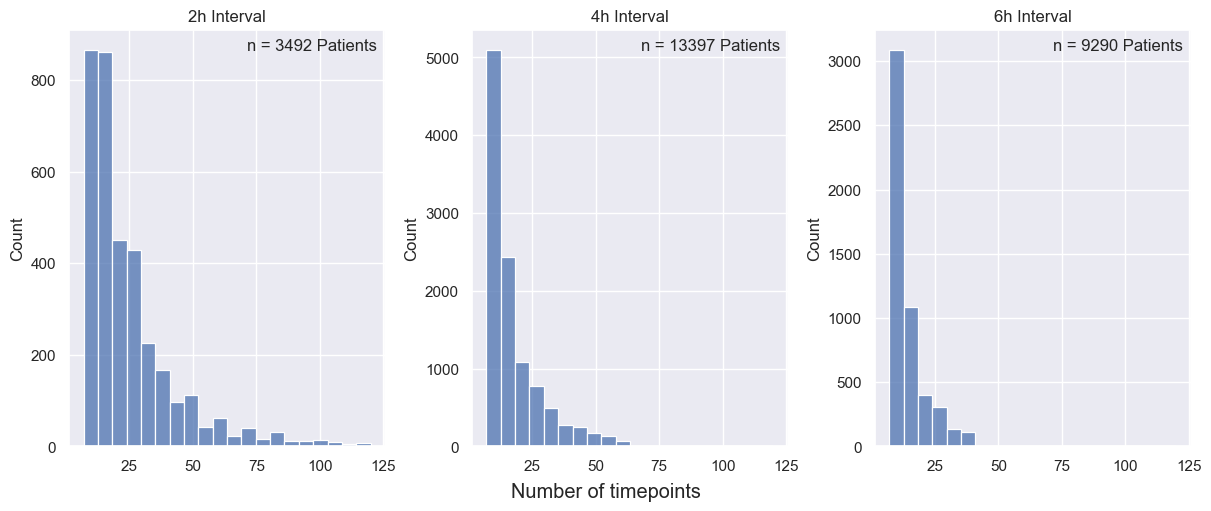

In [3]:
# histograms of subject_id group sizes
fig = plt.figure(constrained_layout=True, figsize=(12,5))
ax2h, ax4h, ax6h = fig.subplots(1,3, sharex=True, sharey=False)

bins = np.histogram_bin_edges(df2h.groupby('subject_id').size(), bins=20)

sns.histplot(df2h.groupby('subject_id').size(), bins=bins, ax=ax2h )
sns.histplot(df4h.groupby('subject_id').size(), bins=bins, ax=ax4h )
sns.histplot(df6h.groupby('subject_id').size(), bins=bins, ax=ax6h )
# plt.annotate(f"Patients \nN = {df2h.groupby('subject_id').ngroups}", xy=(0.90, 0.90), xycoords='axes fraction')

ax2h.set_title('2h Interval')
ax2h.text(0.975, 0.95, f"n = {df2h.groupby('subject_id').ngroups} Patients" , ha='right',transform=ax2h.transAxes)
ax4h.set_title('4h Interval')
ax4h.text(0.975, 0.95, f"n = {df4h.groupby('subject_id').ngroups} Patients", ha='right',transform=ax4h.transAxes)
ax6h.set_title('6h Interval')
ax6h.text(0.975, 0.95, f"n = {df6h.groupby('subject_id').ngroups} Patients", ha='right',transform=ax6h.transAxes)


fig.supxlabel('Number of timepoints',)
plt.show()

In [58]:
means = np.array([df2h.mean()[:5],df4h.mean()[:5], df6h.mean()[:5]])
stds = np.array([df2h.std()[:5],df4h.std()[:5], df6h.std()[:5]])
sems = np.array([df2h.sem()[:5],df4h.sem()[:5], df6h.sem()[:5]])

C:\Users\victo\AppData\Local\Temp\ipykernel_21168\593164880.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = np.array([df2h.mean()[:5],df4h.mean()[:5], df6h.mean()[:5]])
C:\Users\victo\AppData\Local\Temp\ipykernel_21168\593164880.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = np.array([df2h.mean()[:5],df4h.mean()[:5], df6h.mean()[:5]])
C:\Users\victo\AppData\Local\Temp\ipykernel_21168\593164880.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it wi

In [49]:
describeall = pd.DataFrame(
    {
        "Patients" : [df2h.groupby('subject_id').ngroups, df4h.groupby('subject_id').ngroups, df6h.groupby('subject_id').ngroups],
        "Observations" : [df2h.size, df4h.size, df6h.size],
        "Avg. Obs. per Patient" : [df2h.groupby('subject_id').size().mean(), df4h.groupby('subject_id').size().mean(), df6h.groupby('subject_id').size().mean()],
        "Heart Rate mean" : means.T[0],
        "Heart Rate std" : stds.T[0],
        "Systolic BP mean" : means.T[1],
        "Systolic BP std" : stds.T[1],
        "Diastolic BR mean" : means.T[2],
        "Diastolic BR std" : stds.T[2],
        "Respiratory Rate mean" : means.T[3],
        "Respiratory Rate std" : stds.T[3],
        "Oxygen Saturation mean" : means.T[4],
        "Oxygen Saturation std" : stds.T[4],
    }
)

In [61]:
desc = pd.DataFrame(
        {
            "2h Means" : means[0],
            "2h Stds" : stds[0],
            "4h Means" : means[1],
            "4h Stds" : stds[1],
            "6h Means" : means[2],
            "6h Stds" : stds[2],
        }
)

In [178]:
for df in [df2h, df4h, df6h]:
    df['age'] = df['age'].factorize(sort=True)[0] # factorize the age so it can be used as a conditional variable
df2h.drop('hospital_expire_flag', axis=1).corr()

C:\Users\victo\AppData\Local\Temp\ipykernel_21168\1959899455.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2h.drop('hospital_expire_flag', axis=1).corr()


,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,respiratory_rate,oxygen_saturation,age
heart_rate,1.000000,-0.007154,0.220104,0.265217,-0.087052,-0.169957
systolic_blood_pressure,-0.007154,1.000000,0.512737,0.060008,0.048800,0.030483
diastolic_blood_pressure,0.220104,0.512737,1.000000,0.070473,0.014456,-0.301570
respiratory_rate,0.265217,0.060008,0.070473,1.000000,-0.154262,0.046574
oxygen_saturation,-0.087052,0.048800,0.014456,-0.154262,1.000000,-0.055663
age,-0.169957,0.030483,-0.301570,0.046574,-0.055663,1.000000


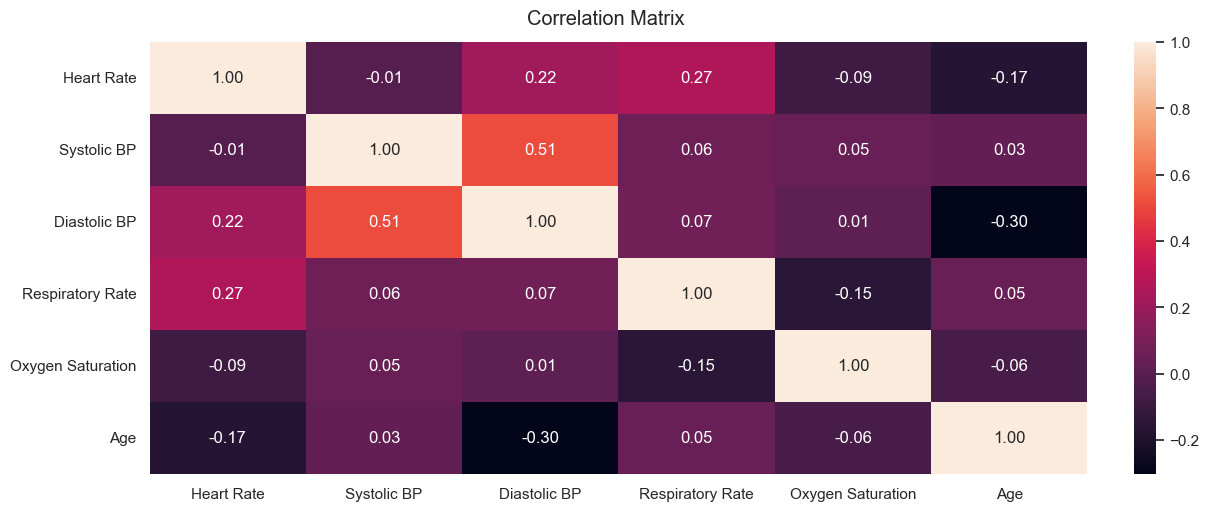

In [200]:
fig = plt.figure(constrained_layout=True, figsize=(12,5))
# subfig = fig.subfigures(1, 1)


feats = ['heart_rate', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'respiratory_rate', 'oxygen_saturation']
titles = ['Heart Rate', 'Systolic BP', 'Diastolic BP', 'Respiratory Rate', 'Oxygen Saturation', "Age"]
units = ['bpm', 'mmHg', 'mmHg', 'bpm', '%']

corr = df2h.drop('hospital_expire_flag', axis=1).select_dtypes('number').corr()
sns.heatmap(corr, annot=True, fmt='.2f', xticklabels=titles, yticklabels=titles)

fig.suptitle('Correlation Matrix')
# fig.xticklabels(titles)

plt.savefig('outdata/images/corrplot.pdf', bbox_inches='tight')  
plt.show()

In [195]:
corr.drop('age', axis=1).abs().describe()

,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,respiratory_rate,oxygen_saturation
count,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.291581,0.276530,0.353223,0.266089,0.226706
std,0.359217,0.402753,0.363005,0.368796,0.381757
min,0.007154,0.007154,0.014456,0.046574,0.014456
25%,0.107778,0.035062,0.107881,0.062624,0.050516
50%,0.195030,0.054404,0.260837,0.112367,0.071358
75%,0.253939,0.399555,0.459945,0.237478,0.137460
max,1.000000,1.000000,1.000000,1.000000,1.000000


## Outliers

### Heart Rate

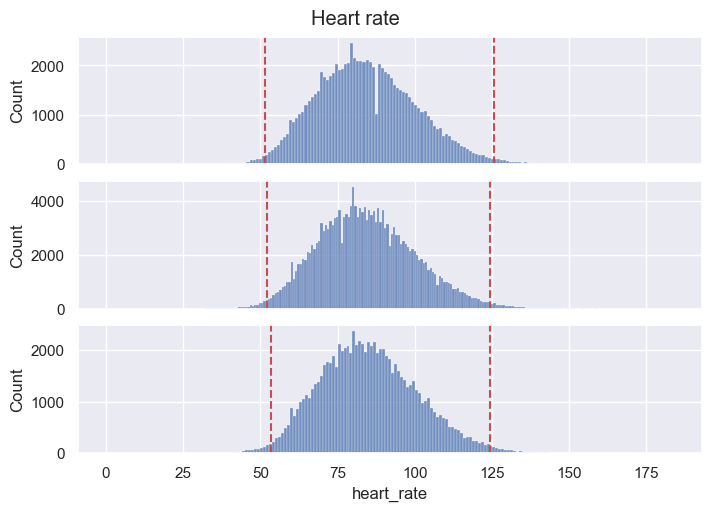

In [5]:
feature = 'heart_rate'
bounds_2h = np.quantile(df2h[feature], [0.01,0.99])
bounds_4h = np.quantile(df4h[feature], [0.01,0.99])
bounds_6h = np.quantile(df6h[feature], [0.01,0.99])

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle('Heart rate')
sns.histplot(ax=axs[0], data = df2h, x=feature)
sns.histplot(ax=axs[1], data = df4h, x=feature)
sns.histplot(ax=axs[2], data = df6h, x=feature)

axs[0].axvline(x=bounds_2h[0], color='r', linestyle='dashed')
axs[0].axvline(x=bounds_2h[1], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[0], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[1], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[0], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[1], color='r', linestyle='dashed')


plt.show()

### Systolic blood pressure

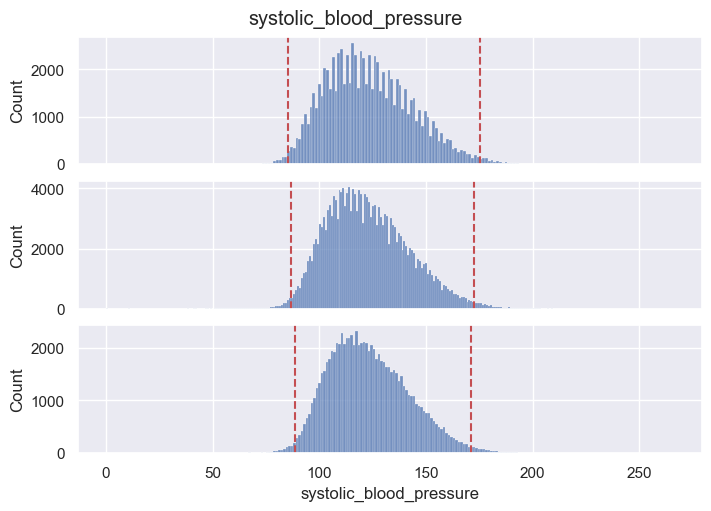

In [6]:
feature = 'systolic_blood_pressure'
bounds_2h = np.quantile(df2h[feature], [0.01,0.99])
bounds_4h = np.quantile(df4h[feature], [0.01,0.99])
bounds_6h = np.quantile(df6h[feature], [0.01,0.99])

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.histplot(ax=axs[0], data = df2h, x=feature)
sns.histplot(ax=axs[1], data = df4h, x=feature)
sns.histplot(ax=axs[2], data = df6h, x=feature)

axs[0].axvline(x=bounds_2h[0], color='r', linestyle='dashed')
axs[0].axvline(x=bounds_2h[1], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[0], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[1], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[0], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[1], color='r', linestyle='dashed')

plt.show()

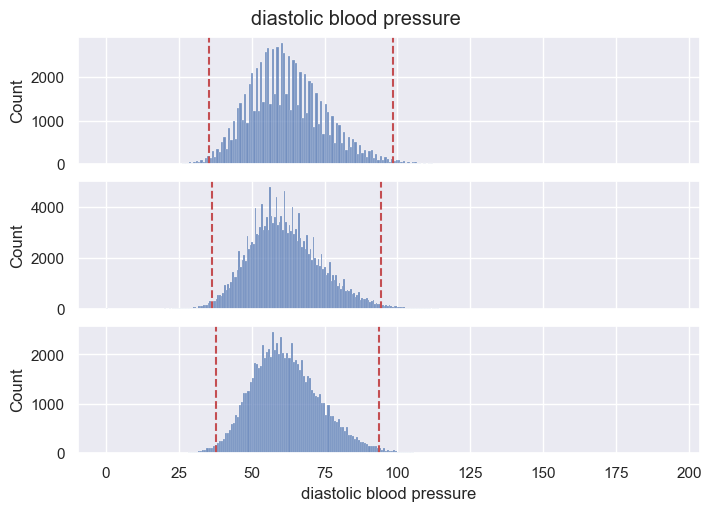

In [6]:
feature = 'diastolic blood pressure'
bounds_2h = np.quantile(df2h[feature], [0.01,0.99])
bounds_4h = np.quantile(df4h[feature], [0.01,0.99])
bounds_6h = np.quantile(df6h[feature], [0.01,0.99])

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.histplot(ax=axs[0], data = df2h, x=feature)
sns.histplot(ax=axs[1], data = df4h, x=feature)
sns.histplot(ax=axs[2], data = df6h, x=feature)

axs[0].axvline(x=bounds_2h[0], color='r', linestyle='dashed')
axs[0].axvline(x=bounds_2h[1], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[0], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[1], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[0], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[1], color='r', linestyle='dashed')

plt.show()

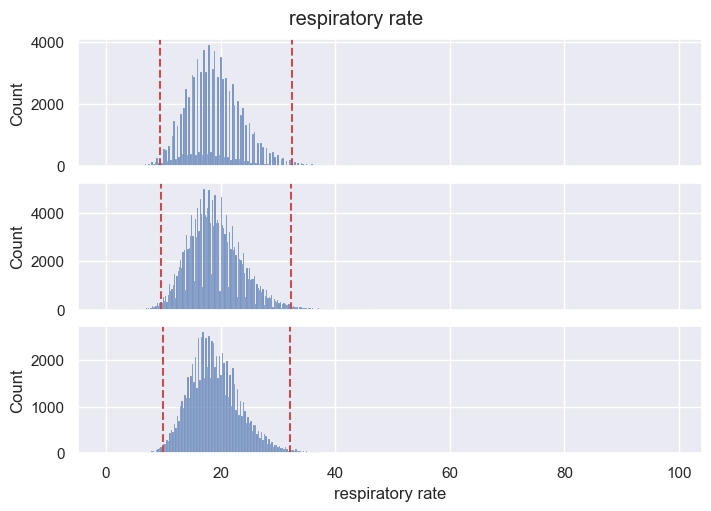

In [7]:
feature = 'respiratory rate'
bounds_2h = np.quantile(df2h[feature], [0.01,0.99])
bounds_4h = np.quantile(df4h[feature], [0.01,0.99])
bounds_6h = np.quantile(df6h[feature], [0.01,0.99])

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.histplot(ax=axs[0], data = df2h, x=feature)
sns.histplot(ax=axs[1], data = df4h, x=feature)
sns.histplot(ax=axs[2], data = df6h, x=feature)

axs[0].axvline(x=bounds_2h[0], color='r', linestyle='dashed')
axs[0].axvline(x=bounds_2h[1], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[0], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[1], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[0], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[1], color='r', linestyle='dashed')

plt.show()

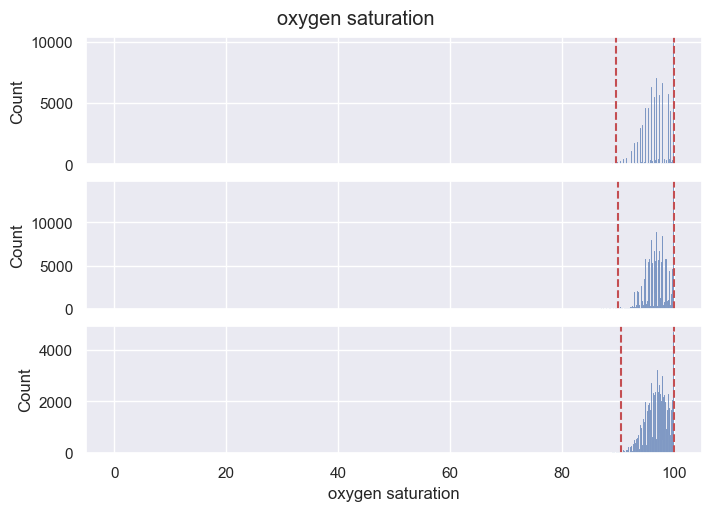

In [8]:
feature = 'oxygen saturation'
bounds_2h = np.quantile(df2h[feature], [0.01,0.99])
bounds_4h = np.quantile(df4h[feature], [0.01,0.99])
bounds_6h = np.quantile(df6h[feature], [0.01,0.99])

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.histplot(ax=axs[0], data = df2h, x=feature)
sns.histplot(ax=axs[1], data = df4h, x=feature)
sns.histplot(ax=axs[2], data = df6h, x=feature)

axs[0].axvline(x=bounds_2h[0], color='r', linestyle='dashed')
axs[0].axvline(x=bounds_2h[1], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[0], color='r', linestyle='dashed')
axs[1].axvline(x=bounds_4h[1], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[0], color='r', linestyle='dashed')
axs[2].axvline(x=bounds_6h[1], color='r', linestyle='dashed')

plt.show()

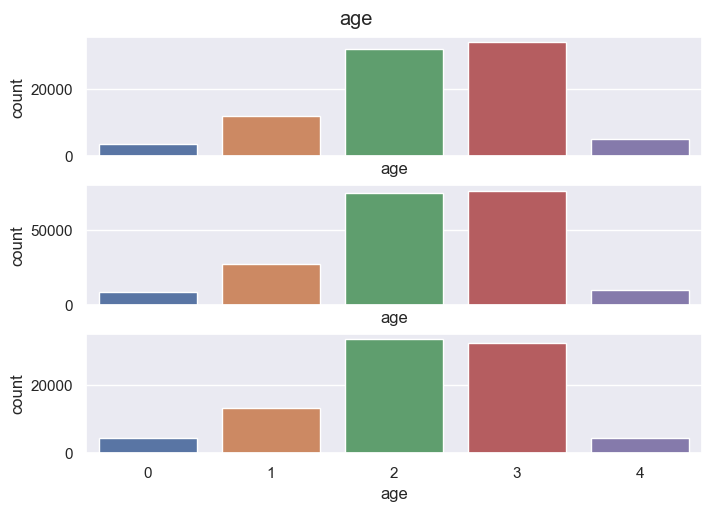

In [9]:
feature = 'age'
order=['<30', '30-49', '50-69', '70-89', '>90']

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.countplot(ax=axs[0], data = df2h, x=feature)
sns.countplot(ax=axs[1], data = df4h, x=feature)
sns.countplot(ax=axs[2], data = df6h, x=feature)



plt.show()

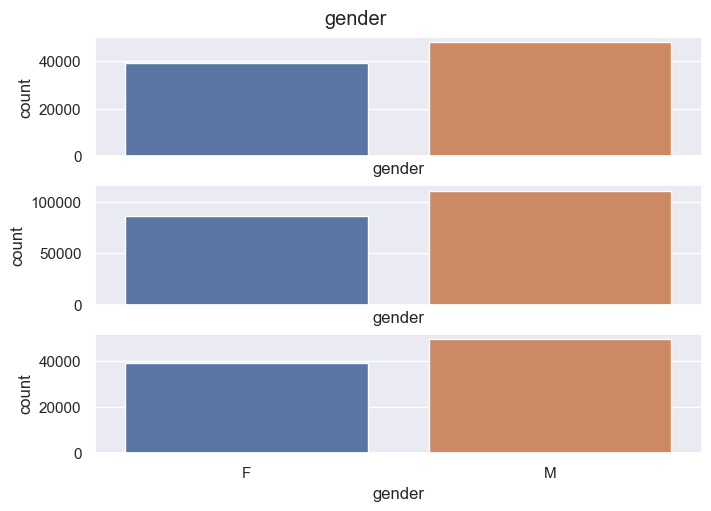

In [10]:
feature = 'gender'
order=['F', 'M']

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.countplot(ax=axs[0], data = df2h, x=feature, order=order)
sns.countplot(ax=axs[1], data = df4h, x=feature, order=order)
sns.countplot(ax=axs[2], data = df6h, x=feature, order=order)



plt.show()

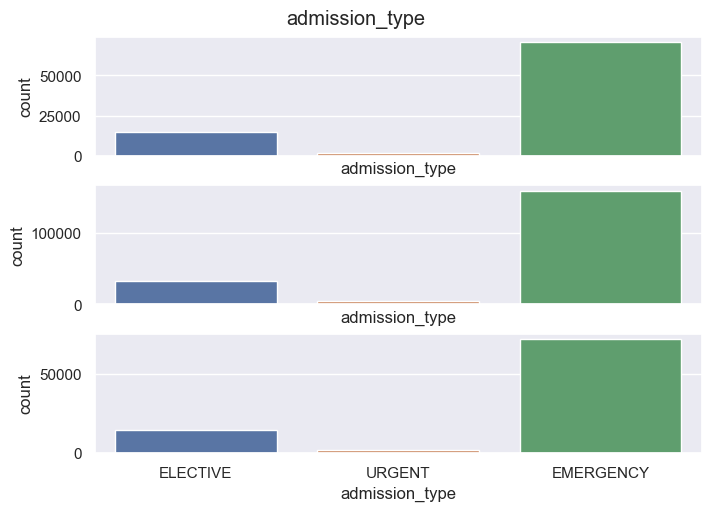

In [11]:
feature = 'admission_type'
order=['ELECTIVE', 'URGENT', 'EMERGENCY']

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.countplot(ax=axs[0], data = df2h, x=feature, order=order)
sns.countplot(ax=axs[1], data = df4h, x=feature, order=order)
sns.countplot(ax=axs[2], data = df6h, x=feature, order=order)



plt.show()

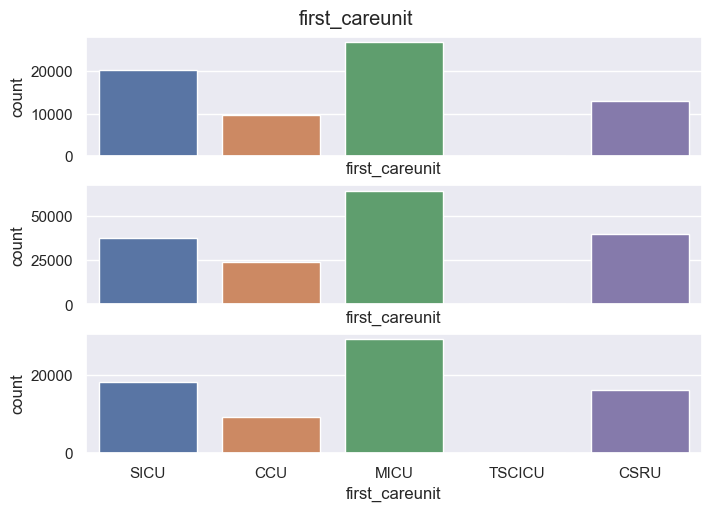

In [12]:
feature = 'first_careunit'
order=['SICU', 'CCU', 'MICU', 'TSCICU', 'CSRU']

fig = plt.figure(constrained_layout=True, figsize=(7, 5))
gs = fig.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=False)

fig.suptitle(feature)
sns.countplot(ax=axs[0], data = df2h, x=feature, order=order)
sns.countplot(ax=axs[1], data = df4h, x=feature, order=order)
sns.countplot(ax=axs[2], data = df6h, x=feature, order=order)



plt.show()

## Missing Value Distributions

For now all visualizations are based on the 2h dataset

### MCAR

In [100]:
def mcar_miss_data(df):
    df = df.copy().select_dtypes(np.number).drop('hospital_expire_flag', axis=1)
    outdf = None

    for misstype in ['single', 'patient', 'both']:
        miss_df = induce_mcar(df=df, miss_rate=0.5, miss_type=misstype)
        for col in miss_df:
            miss_df[col] = np.where(miss_df[col].isna(), 'Missing', 'Not Missing')
        
        miss_df = miss_df.drop('age', axis=1)
        miss_df['miss_type'] = misstype
        miss_df = pd.concat([df,miss_df.add_suffix('_mv')], axis=1)
        outdf = pd.concat([outdf,miss_df], axis=0)
        
    return outdf


In [101]:
mcar_mv = mcar_miss_data(df2h)

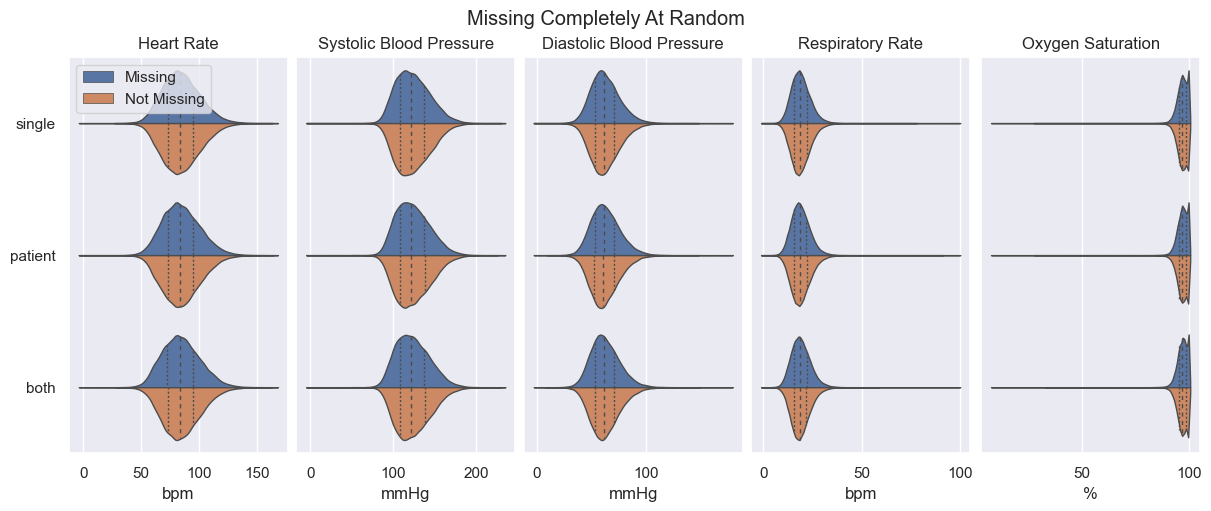

In [37]:
fig = plt.figure(constrained_layout=True, figsize=(12,5))
subfig = fig.subfigures(1, 1)


feats = ['heart_rate', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'respiratory_rate', 'oxygen_saturation']
titles = ['Heart Rate', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Respiratory Rate', 'Oxygen Saturation']
units = ['bpm', 'mmHg', 'mmHg', 'bpm', '%']

feat = 'heart rate'
feat_mv = feat + '_mv'

mcar = subfig.subplots(1,5, sharey=True)

sns.violinplot(mcar_mv ,ax=mcar[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'], linewidth=1)
sns.violinplot(mcar_mv ,ax=mcar[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'], linewidth=1)
sns.violinplot(mcar_mv ,ax=mcar[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'], linewidth=1)
sns.violinplot(mcar_mv ,ax=mcar[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'], linewidth=1)
sns.violinplot(mcar_mv ,ax=mcar[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'], linewidth=1)

fig.suptitle('Missing Completely At Random')

for ax, t, u in zip(mcar[1:], titles[1:], units[1:]):
    ax.set_xlabel(u)
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.legend_.remove()
    ax.set_title(t)

mcar[0].set_xlabel(units[0])
mcar[0].set_ylabel('')
mcar[0].set_yticklabels(['single', 'patient', 'both'])
mcar[0].legend(loc='upper left', title=None)
mcar[0].set_title(titles[0])



plt.show()

### MAR

In [102]:
def mar_miss_data(df):
    df = df.copy().select_dtypes(np.number).drop('hospital_expire_flag', axis=1)
    outdf = None

    for misstype in ['single', 'patient', 'both']:
        miss_df = induce_mar(df=df, cond_var='age', miss_rate=0.5, miss_weights='equal', miss_type=misstype)
        for col in miss_df:
            miss_df[col] = np.where(miss_df[col].isna(), 'Missing', 'Not Missing')
        
        miss_df = miss_df.drop('age', axis=1)
        miss_df['miss_type'] = misstype
        miss_df = pd.concat([df,miss_df.add_suffix('_mv')], axis=1)
        outdf = pd.concat([outdf,miss_df], axis=0)
        
    return outdf


In [103]:
mar_mv = mar_miss_data(df2h)

In [64]:
mar_mv

heart_rate  systolic_blood_pressure  diastolic_blood_pressure  \
subject_id 2h                                                                  
49         0    69.458333                   101.00                 52.041667   
           1    71.875000                   103.75                 51.875000   
           2    72.166667                   103.00                 53.666667   
           3    80.500000                    98.50                 50.750000   
           4    87.250000                   104.75                 49.250000   
...                   ...                      ...                       ...   
99946      5    96.500000                   151.00                103.500000   
           6    91.000000                   143.50                 98.500000   
           7    99.000000                   143.50                 97.500000   
           8    94.000000                   135.00                 91.000000   
           9   104.000000                   141.00                108.000000   

               respiratory_rate  oxygen_saturation  age heart_rate_mv  \
subject_id 2h                                                           
49         0          10.450000          99.833333    3   Not Missing   
           1          13.875000          98.791667    3       Missing   
           2          13.166667          99.083333    3   Not Missing   
           3          15.500000          98.625000    3   Not Missing   
           4          16.500000          96.900000    3   Not Missing   
...                         ...                ...  ...           ...   
99946      5          11.500000          97.500000    1       Missing   
           6          12.000000          98.000000    1   Not Missing   
           7          13.500000          93.500000    1   Not Missing   
           8          14.000000          93.000000    1   Not Missing   
           9          13.000000          92.000000    1   Not Missing   

              systolic_blood_pressure_mv diastolic_blood_pressure_mv  \
subject_id 2h                                                          
49         0                     Missing                 Not Missing   
           1                 Not Missing                     Missing   
           2                     Missing                     Missing   
           3                     Missing                     Missing   
           4                 Not Missing                     Missing   
...                                  ...                         ...   
99946      5                 Not Missing                 Not Missing   
           6                     Missing                 Not Missing   
           7                 Not Missing                     Missing   
           8                 Not Missing                 Not Missing   
           9                 Not Missing                     Missing   

              respiratory_rate_mv oxygen_saturation_mv miss_type_mv  
subject_id 2h                                                        
49         0          Not Missing          Not Missing       single  
           1          Not Missing          Not Missing       single  
           2          Not Missing              Missing       single  
           3              Missing              Missing       single  
           4          Not Missing          Not Missing       single  
...                           ...                  ...          ...  
99946      5              Missing          Not Missing         both  
           6          Not Missing          Not Missing         both  
           7          Not Missing              Missing         both  
           8          Not Missing              Missing         both  
           9          Not Missing          Not Missing         both  

[260706 rows x 12 columns]

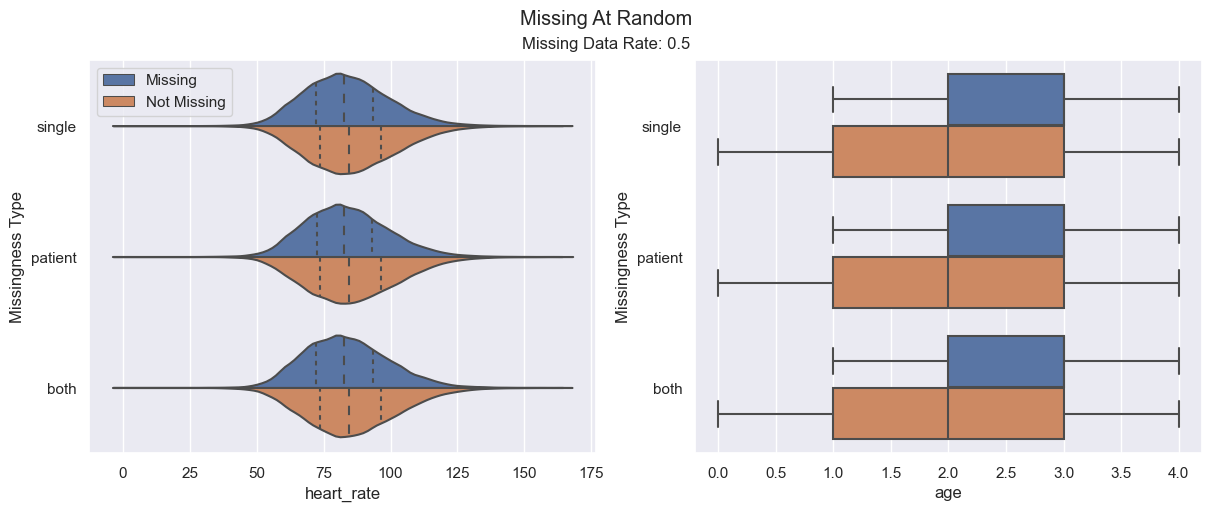

In [73]:
fig = plt.figure(constrained_layout=True, figsize=(12,5))
subfig = fig.subfigures(1, 1)

feat = 'heart_rate'
feat_mv = feat + '_mv'

axs = subfig.subplots(1,2, sharey=True)
for ax in axs:
    ax.tick_params('y', reset=True, left=False, right=False)


sns.violinplot(mar_mv ,ax=axs[0], x=feat, y='miss_type_mv', hue=feat_mv, split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.boxplot(mar_mv ,ax=axs[1], x='age', y='miss_type_mv', hue=feat_mv, hue_order=['Missing', 'Not Missing'])


fig.suptitle('Missing At Random')
subfig.suptitle('Missing Data Rate: 0.5', fontsize=12)


axs[0].legend(loc='upper left', title=None)
axs[1].legend_.remove()

axs[0].set_ylabel('Missingness Type')
axs[1].set_ylabel('Missingness Type')


# plt.savefig('outdata/images/mar_mv_distribution')
plt.show()

### MNAR

In [104]:
def mnar_miss_data(df, missrate=0.5):
    df = df.copy().select_dtypes(np.number).drop('hospital_expire_flag', axis=1)
    outdf = None

    for misstype in ['single', 'patient', 'both']:
        miss_df = induce_mnar(df=df, miss_rate=missrate, miss_weights='equal', miss_type=misstype)
        for col in miss_df:
            miss_df[col] = np.where(miss_df[col].isna(), 'Missing', 'Not Missing')
        
        miss_df = miss_df.drop('age', axis=1)
        miss_df['miss_type'] = misstype
        miss_df = pd.concat([df,miss_df.add_suffix('_mv')], axis=1)
        outdf = pd.concat([outdf,miss_df], axis=0)
        
    return outdf


In [105]:
mnar_mv = mnar_miss_data(df2h)

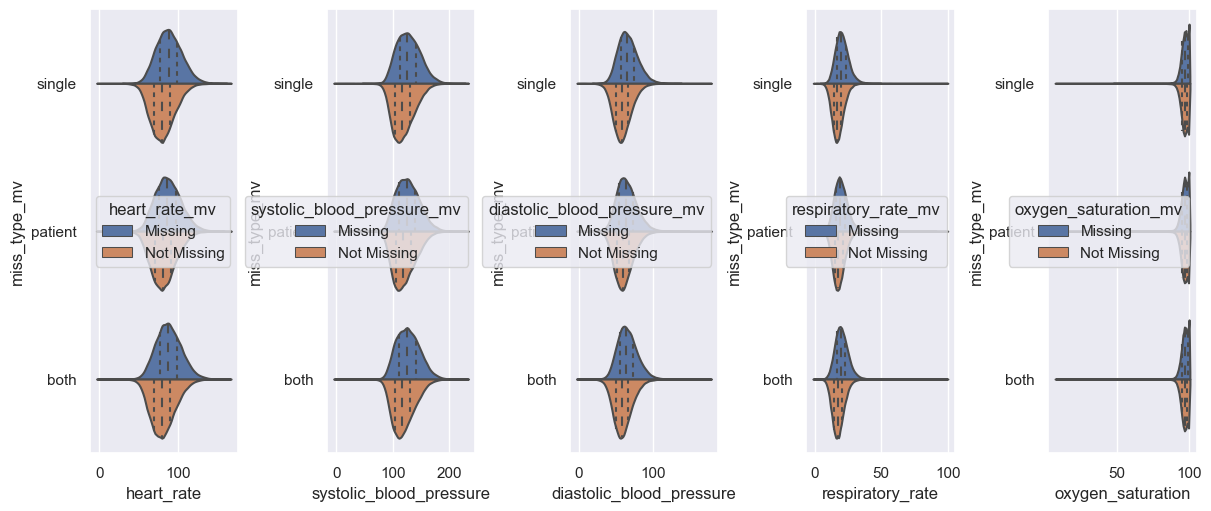

In [17]:
fig = plt.figure(constrained_layout=True, figsize=(12,5))
subfig = fig.subfigures(1, 1)


feats = ['heart_rate', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'respiratory_rate', 'oxygen_saturation']
feat = 'heart rate'
feat_mv = feat + '_mv'

axs = subfig.subplots(1,5, sharey=True)
for ax in axs:
    ax.tick_params('y', reset=True, left=False, right=False)

sns.violinplot(mnar_mv ,ax=axs[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_mv ,ax=axs[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_mv ,ax=axs[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_mv ,ax=axs[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_mv ,ax=axs[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])

# fig.suptitle('Missing Completely At Random')
# subfig.suptitle('Missing Data Rate: 0.5', fontsize=12)

# axs[0].legend(loc='upper left', title=None)
# axs[1].legend_.remove()

# axs[0].set_ylabel('Missingness Type')
# axs[1].set_ylabel('Missingness Type')

# plt.savefig('outdata/images/mnar_mv_distribution')
plt.show()

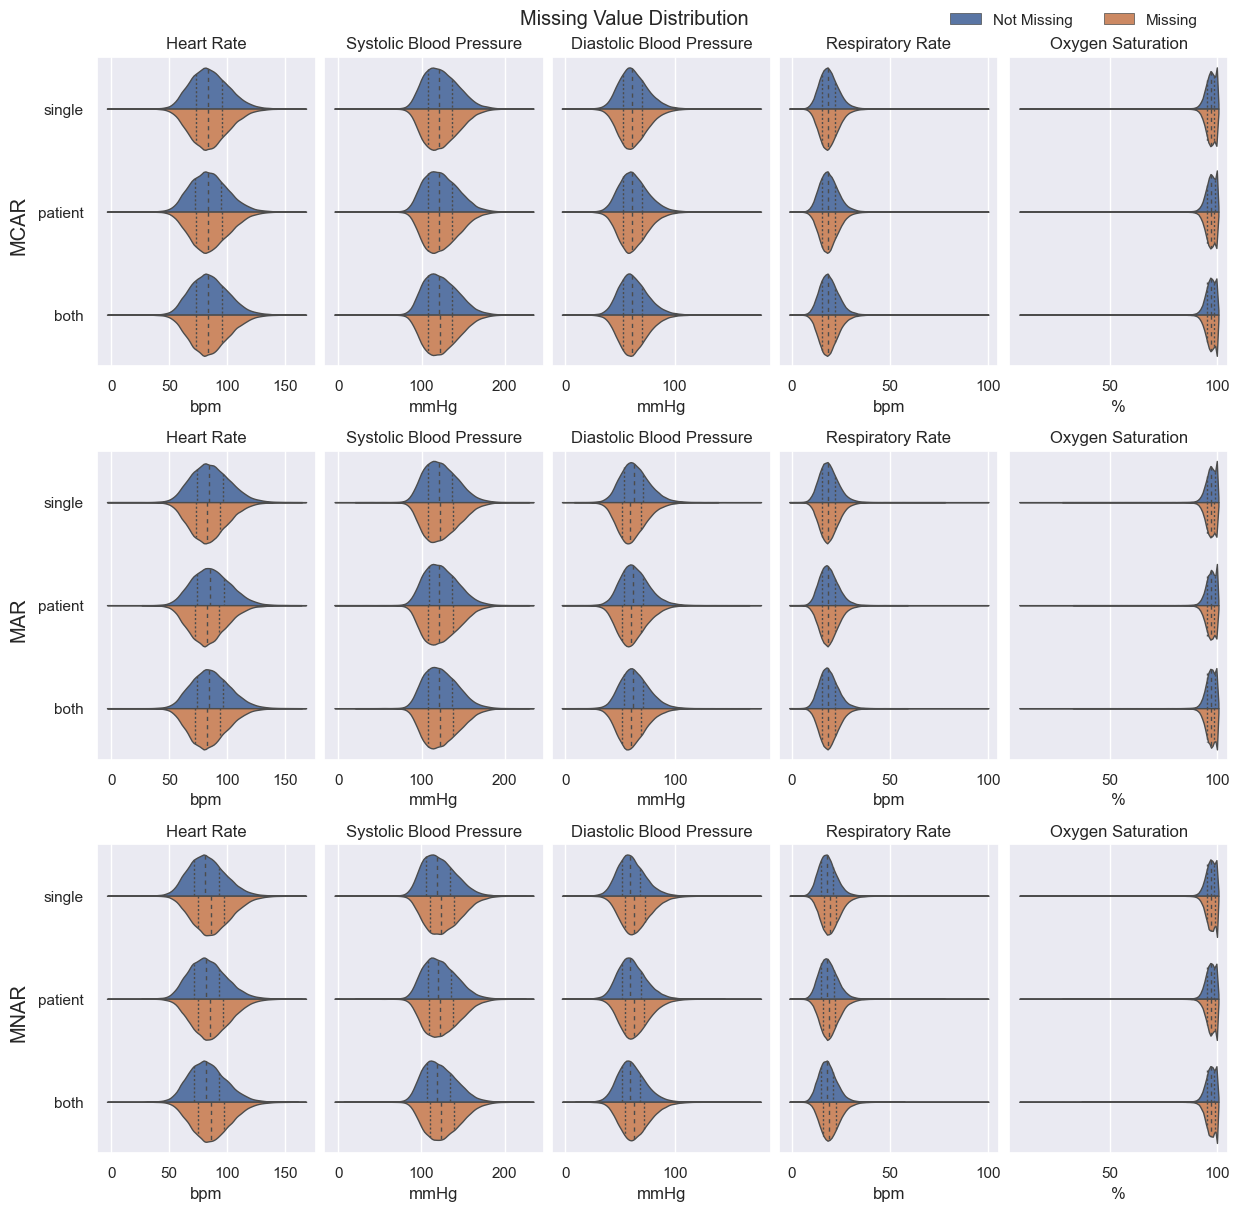

In [173]:
fig = plt.figure(constrained_layout=True, figsize=(12,12))
subfig = fig.subfigures(3, 1)
fig.suptitle('Missing Completely At Random')


feats = ['heart_rate', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'respiratory_rate', 'oxygen_saturation']
titles = ['Heart Rate', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Respiratory Rate', 'Oxygen Saturation']
units = ['bpm', 'mmHg', 'mmHg', 'bpm', '%']

mcar = subfig[0].subplots(1,5, sharey=True)
mar = subfig[1].subplots(1,5, sharey=True)
mnar = subfig[2].subplots(1,5, sharey=True)

plt.suptitle('Missing Value Distribution')
subfig[0].suptitle('MCAR',x=-0.02, y=0.5, ha='left', va='center', rotation=90)
subfig[1].suptitle('MAR',x=-0.02, y=0.5, ha='left', va='center', rotation=90)
subfig[2].suptitle('MNAR',x=-0.02, y=0.5, ha='left', va='center', rotation=90)

sns.violinplot(mcar_mv ,ax=mcar[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mcar_mv ,ax=mcar[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mcar_mv ,ax=mcar[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mcar_mv ,ax=mcar[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mcar_mv ,ax=mcar[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)

sns.violinplot(mar_mv ,ax=mar[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mar_mv ,ax=mar[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mar_mv ,ax=mar[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mar_mv ,ax=mar[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mar_mv ,ax=mar[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)

sns.violinplot(mnar_mv ,ax=mnar[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mnar_mv ,ax=mnar[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mnar_mv ,ax=mnar[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mnar_mv ,ax=mnar[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
sns.violinplot(mnar_mv ,ax=mnar[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)


for ax, t, u in zip(mcar[1:], titles[1:], units[1:]):
    ax.set_xlabel(u)
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.legend_.remove()
    ax.set_title(t)

mcar[0].set_xlabel(units[0])
mcar[0].set_ylabel('')
mcar[0].set_yticklabels(['single', 'patient', 'both'])
mcar[0].legend_.remove()
# mcar[0].legend(loc='upper left', ncol=2, title=None, frameon=False)
mcar[0].set_title(titles[0])

for ax, t, u in zip(mar[1:], titles[1:], units[1:]):
    ax.set_xlabel(u)
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.legend_.remove()
    ax.set_title(t)

mar[0].set_xlabel(units[0])
mar[0].set_ylabel('')
mar[0].set_yticklabels(['single', 'patient', 'both'])
mar[0].legend_.remove()
mar[0].set_title(titles[0])

for ax, t, u in zip(mnar[1:], titles[1:], units[1:]):
    ax.set_xlabel(u)
    ax.set_ylabel('')
    ax.set_yticklabels('')
    ax.legend_.remove()
    ax.set_title(t)

mnar[0].set_xlabel(units[0])
mnar[0].set_ylabel('')
mnar[0].set_yticklabels(['single', 'patient', 'both'])
mnar[0].legend_.remove()
mnar[0].set_title(titles[0])

fig.legend(ncol=2, frameon=False)

# plt.savefig('outdata/images/mv_distribution.pdf', bbox_inches='tight')  
plt.show()

In [68]:
rates = [0.05, 0.1, 0.25, 0.5, 0.75]
mnar_diffrates = [mnar_miss_data(df2h, mr) for mr in rates]


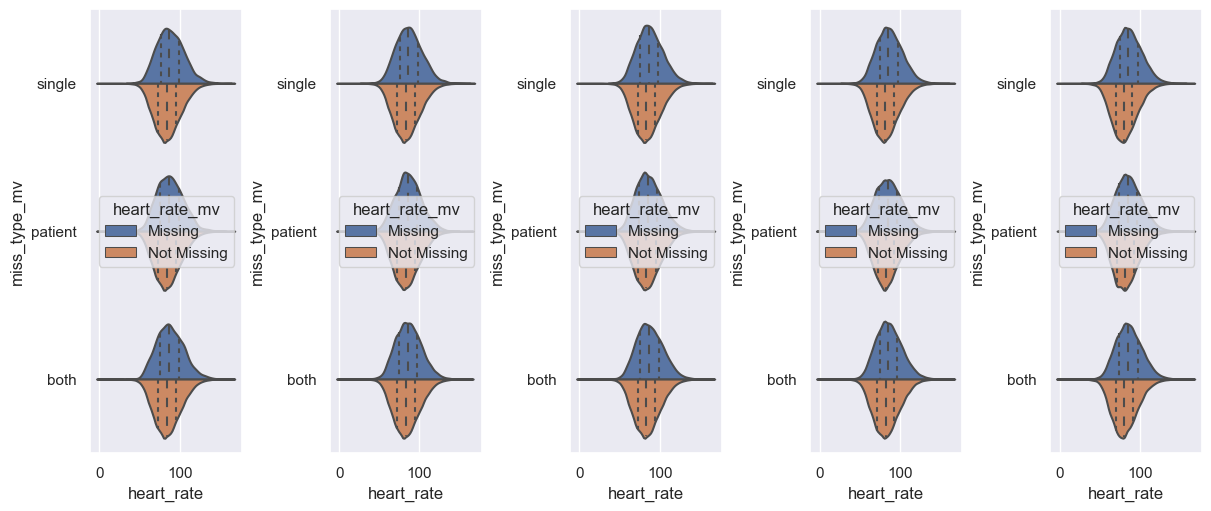

In [71]:
fig = plt.figure(constrained_layout=True, figsize=(12,5))
subfig = fig.subfigures(1, 1)


feats = ['heart_rate', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'respiratory_rate', 'oxygen_saturation']
feat = 'heart rate'
feat_mv = feat + '_mv'

axs = subfig.subplots(1,5, sharey=True)
for ax in axs:
    ax.tick_params('y', reset=True, left=False, right=False)

sns.violinplot(mnar_diffrates[0] ,ax=axs[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_diffrates[1] ,ax=axs[1], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_diffrates[2] ,ax=axs[2], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_diffrates[3] ,ax=axs[3], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.violinplot(mnar_diffrates[4] ,ax=axs[4], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])

# fig.suptitle('Missing Completely At Random')
# subfig.suptitle('Missing Data Rate: 0.5', fontsize=12)

# axs[0].legend(loc='upper left', title=None)
# axs[1].legend_.remove()

# axs[0].set_ylabel('Missingness Type')
# axs[1].set_ylabel('Missingness Type')

# plt.savefig('outdata/images/mnar_mv_distribution')
plt.show()

In [84]:
hrdiff = [mnar_diffrates[0][mnar_diffrates[0]['heart_rate_mv'] == 'Missing'].heart_rate.mean() - mnar_diffrates[0][mnar_diffrates[0]['heart_rate_mv'] == 'Not Missing'].heart_rate.mean(),mnar_diffrates[1][mnar_diffrates[1]['heart_rate_mv'] == 'Missing'].heart_rate.mean() - mnar_diffrates[1][mnar_diffrates[1]['heart_rate_mv'] == 'Not Missing'].heart_rate.mean(),mnar_diffrates[2][mnar_diffrates[2]['heart_rate_mv'] == 'Missing'].heart_rate.mean() - mnar_diffrates[2][mnar_diffrates[2]['heart_rate_mv'] == 'Not Missing'].heart_rate.mean(),mnar_diffrates[3][mnar_diffrates[3]['heart_rate_mv'] == 'Missing'].heart_rate.mean() - mnar_diffrates[3][mnar_diffrates[3]['heart_rate_mv'] == 'Not Missing'].heart_rate.mean(),mnar_diffrates[4][mnar_diffrates[4]['heart_rate_mv'] == 'Missing'].heart_rate.mean() - mnar_diffrates[4][mnar_diffrates[4]['heart_rate_mv'] == 'Not Missing'].heart_rate.mean()]
sbpdiff = [mnar_diffrates[0][mnar_diffrates[0]['systolic_blood_pressure_mv'] == 'Missing'].systolic_blood_pressure.mean() - mnar_diffrates[0][mnar_diffrates[0]['systolic_blood_pressure_mv'] == 'Not Missing'].systolic_blood_pressure.mean(),mnar_diffrates[1][mnar_diffrates[1]['systolic_blood_pressure_mv'] == 'Missing'].systolic_blood_pressure.mean() - mnar_diffrates[1][mnar_diffrates[1]['systolic_blood_pressure_mv'] == 'Not Missing'].systolic_blood_pressure.mean(),mnar_diffrates[2][mnar_diffrates[2]['systolic_blood_pressure_mv'] == 'Missing'].systolic_blood_pressure.mean() - mnar_diffrates[2][mnar_diffrates[2]['systolic_blood_pressure_mv'] == 'Not Missing'].systolic_blood_pressure.mean(),mnar_diffrates[3][mnar_diffrates[3]['systolic_blood_pressure_mv'] == 'Missing'].systolic_blood_pressure.mean() - mnar_diffrates[3][mnar_diffrates[3]['systolic_blood_pressure_mv'] == 'Not Missing'].systolic_blood_pressure.mean(),mnar_diffrates[4][mnar_diffrates[4]['systolic_blood_pressure_mv'] == 'Missing'].systolic_blood_pressure.mean() - mnar_diffrates[4][mnar_diffrates[4]['systolic_blood_pressure_mv'] == 'Not Missing'].systolic_blood_pressure.mean()]
dbpdiff = [mnar_diffrates[0][mnar_diffrates[0]['diastolic_blood_pressure_mv'] == 'Missing'].diastolic_blood_pressure.mean() - mnar_diffrates[0][mnar_diffrates[0]['diastolic_blood_pressure_mv'] == 'Not Missing'].diastolic_blood_pressure.mean(),mnar_diffrates[1][mnar_diffrates[1]['diastolic_blood_pressure_mv'] == 'Missing'].diastolic_blood_pressure.mean() - mnar_diffrates[1][mnar_diffrates[1]['diastolic_blood_pressure_mv'] == 'Not Missing'].diastolic_blood_pressure.mean(),mnar_diffrates[2][mnar_diffrates[2]['diastolic_blood_pressure_mv'] == 'Missing'].diastolic_blood_pressure.mean() - mnar_diffrates[2][mnar_diffrates[2]['diastolic_blood_pressure_mv'] == 'Not Missing'].diastolic_blood_pressure.mean(),mnar_diffrates[3][mnar_diffrates[3]['diastolic_blood_pressure_mv'] == 'Missing'].diastolic_blood_pressure.mean() - mnar_diffrates[3][mnar_diffrates[3]['diastolic_blood_pressure_mv'] == 'Not Missing'].diastolic_blood_pressure.mean(),mnar_diffrates[4][mnar_diffrates[4]['diastolic_blood_pressure_mv'] == 'Missing'].diastolic_blood_pressure.mean() - mnar_diffrates[4][mnar_diffrates[4]['diastolic_blood_pressure_mv'] == 'Not Missing'].diastolic_blood_pressure.mean()]
rrdiff = [mnar_diffrates[0][mnar_diffrates[0]['respiratory_rate_mv'] == 'Missing'].respiratory_rate.mean() - mnar_diffrates[0][mnar_diffrates[0]['respiratory_rate_mv'] == 'Not Missing'].respiratory_rate.mean(),mnar_diffrates[1][mnar_diffrates[1]['respiratory_rate_mv'] == 'Missing'].respiratory_rate.mean() - mnar_diffrates[1][mnar_diffrates[1]['respiratory_rate_mv'] == 'Not Missing'].respiratory_rate.mean(),mnar_diffrates[2][mnar_diffrates[2]['respiratory_rate_mv'] == 'Missing'].respiratory_rate.mean() - mnar_diffrates[2][mnar_diffrates[2]['respiratory_rate_mv'] == 'Not Missing'].respiratory_rate.mean(),mnar_diffrates[3][mnar_diffrates[3]['respiratory_rate_mv'] == 'Missing'].respiratory_rate.mean() - mnar_diffrates[3][mnar_diffrates[3]['respiratory_rate_mv'] == 'Not Missing'].respiratory_rate.mean(),mnar_diffrates[4][mnar_diffrates[4]['respiratory_rate_mv'] == 'Missing'].respiratory_rate.mean() - mnar_diffrates[4][mnar_diffrates[4]['respiratory_rate_mv'] == 'Not Missing'].respiratory_rate.mean()]
oxdiff = [mnar_diffrates[0][mnar_diffrates[0]['oxygen_saturation_mv'] == 'Missing'].oxygen_saturation.mean() - mnar_diffrates[0][mnar_diffrates[0]['oxygen_saturation_mv'] == 'Not Missing'].oxygen_saturation.mean(),mnar_diffrates[1][mnar_diffrates[1]['oxygen_saturation_mv'] == 'Missing'].oxygen_saturation.mean() - mnar_diffrates[1][mnar_diffrates[1]['oxygen_saturation_mv'] == 'Not Missing'].oxygen_saturation.mean(),mnar_diffrates[2][mnar_diffrates[2]['oxygen_saturation_mv'] == 'Missing'].oxygen_saturation.mean() - mnar_diffrates[2][mnar_diffrates[2]['oxygen_saturation_mv'] == 'Not Missing'].oxygen_saturation.mean(),mnar_diffrates[3][mnar_diffrates[3]['oxygen_saturation_mv'] == 'Missing'].oxygen_saturation.mean() - mnar_diffrates[3][mnar_diffrates[3]['oxygen_saturation_mv'] == 'Not Missing'].oxygen_saturation.mean(),mnar_diffrates[4][mnar_diffrates[4]['oxygen_saturation_mv'] == 'Missing'].oxygen_saturation.mean() - mnar_diffrates[4][mnar_diffrates[4]['oxygen_saturation_mv'] == 'Not Missing'].oxygen_saturation.mean()]

In [85]:
meandiffs = pd.DataFrame(
    {
        "Missing Data Rate" : rates,
        "Heart Rate" : hrdiff,
        "Systolic BP" : sbpdiff,
        "Diastolic BP" : dbpdiff,
        "Respiratory Rate" : rrdiff,
        "Oxygen Saturation" : oxdiff
    }
)

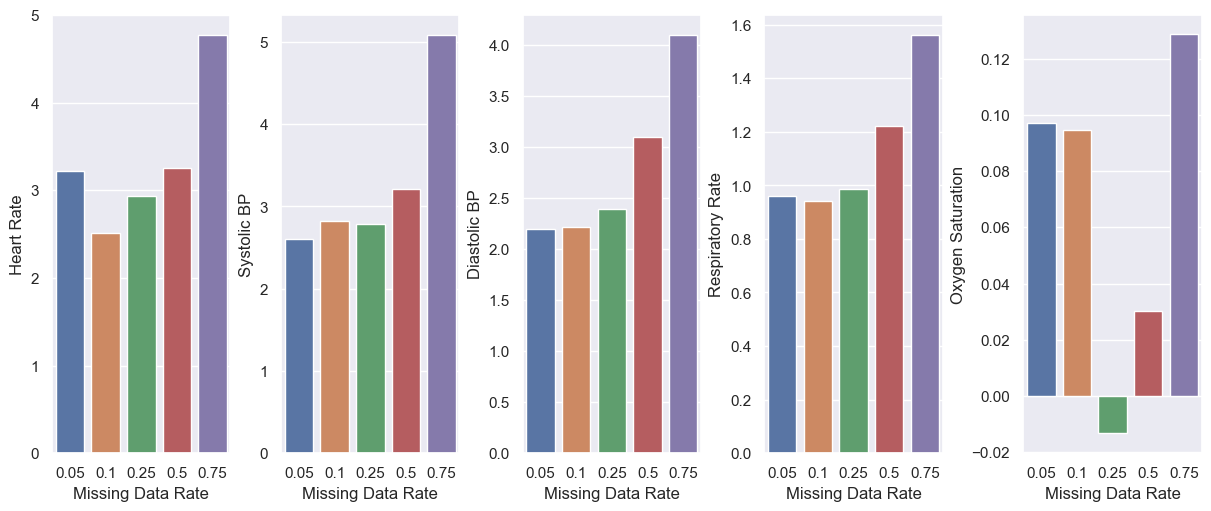

In [93]:
fig = plt.figure(constrained_layout=True, figsize=(12,5))
subfig = fig.subfigures(1, 1)


feats = meandiffs.columns[1:]
feat = 'heart rate'
feat_mv = feat + '_mv'

axs = subfig.subplots(1,5, sharey=False)
# for ax in axs:
#     ax.tick_params('y', reset=True, left=False, right=False)

sns.barplot(meandiffs ,ax=axs[0], x='Missing Data Rate', y=feats[0])#, hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.barplot(meandiffs ,ax=axs[1], x='Missing Data Rate', y=feats[1])#, hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.barplot(meandiffs ,ax=axs[2], x='Missing Data Rate', y=feats[2])#, hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.barplot(meandiffs ,ax=axs[3], x='Missing Data Rate', y=feats[3])#, hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])
sns.barplot(meandiffs ,ax=axs[4], x='Missing Data Rate', y=feats[4])#, hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Missing', 'Not Missing'])

# fig.suptitle('Missing Completely At Random')
# subfig.suptitle('Missing Data Rate: 0.5', fontsize=12)

# axs[0].legend(loc='upper left', title=None)
# axs[1].legend_.remove()

# axs[0].set_ylabel('Missingness Type')
# axs[1].set_ylabel('Missingness Type')

# plt.savefig('outdata/images/mnar_mv_distribution')
plt.show()

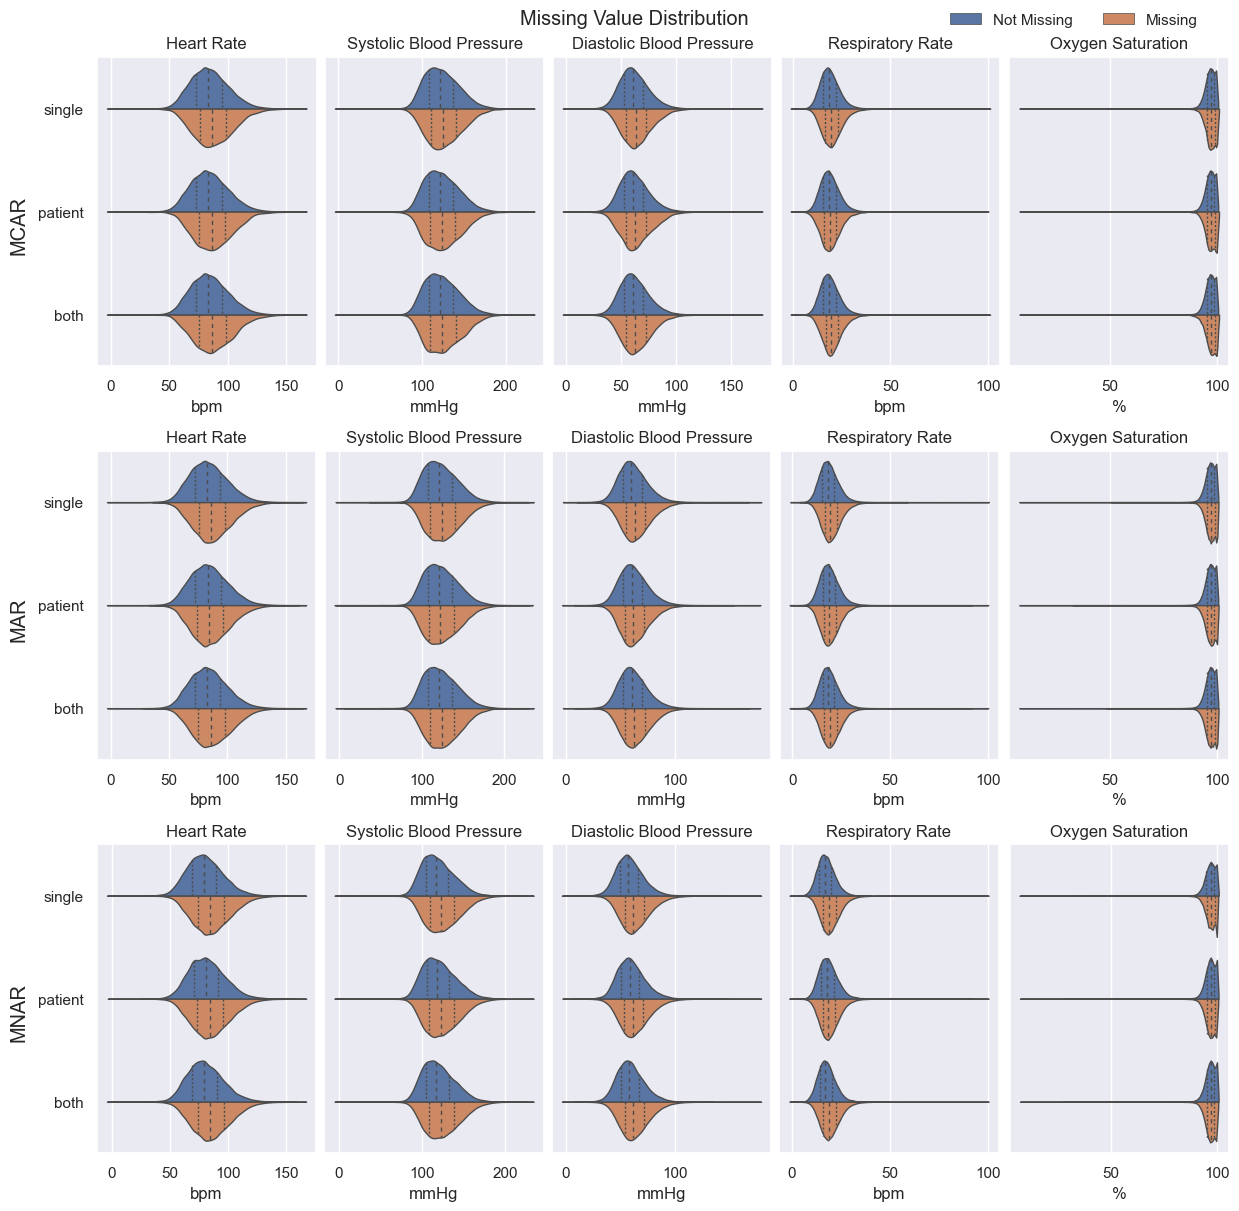

In [96]:
# fig = plt.figure(constrained_layout=True, figsize=(12,12))
# subfig = fig.subfigures(3, 1)
# fig.suptitle('Missing Completely At Random')


# feats = ['heart_rate', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'respiratory_rate', 'oxygen_saturation']
# titles = ['Heart Rate', 'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Respiratory Rate', 'Oxygen Saturation']
# units = ['bpm', 'mmHg', 'mmHg', 'bpm', '%']

# mcar = subfig[0].subplots(1,5, sharey=True)
# mar = subfig[1].subplots(1,5, sharey=True)
# mnar = subfig[2].subplots(1,5, sharey=True)

# plt.suptitle('Missing Value Distribution')
# subfig[0].suptitle('MCAR',x=-0.02, y=0.5, ha='left', va='center', rotation=90)
# subfig[1].suptitle('MAR',x=-0.02, y=0.5, ha='left', va='center', rotation=90)
# subfig[2].suptitle('MNAR',x=-0.02, y=0.5, ha='left', va='center', rotation=90)

# sns.violinplot(mnar_diffrates[0] ,ax=mcar[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[0] ,ax=mcar[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[0] ,ax=mcar[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[0] ,ax=mcar[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[0] ,ax=mcar[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)

# sns.violinplot(mnar_diffrates[2] ,ax=mar[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[2] ,ax=mar[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[2] ,ax=mar[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[2] ,ax=mar[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[2] ,ax=mar[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)

# sns.violinplot(mnar_diffrates[4] ,ax=mnar[0], x=feats[0], y='miss_type_mv', hue=feats[0] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[4] ,ax=mnar[1], x=feats[1], y='miss_type_mv', hue=feats[1] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[4] ,ax=mnar[2], x=feats[2], y='miss_type_mv', hue=feats[2] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[4] ,ax=mnar[3], x=feats[3], y='miss_type_mv', hue=feats[3] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)
# sns.violinplot(mnar_diffrates[4] ,ax=mnar[4], x=feats[4], y='miss_type_mv', hue=feats[4] + '_mv', split=True, inner='quartiles', hue_order=['Not Missing', 'Missing'], linewidth=1, legend=False)


# for ax, t, u in zip(mcar[1:], titles[1:], units[1:]):
#     ax.set_xlabel(u)
#     ax.set_ylabel('')
#     ax.set_yticklabels('')
#     ax.legend_.remove()
#     ax.set_title(t)

# mcar[0].set_xlabel(units[0])
# mcar[0].set_ylabel('')
# mcar[0].set_yticklabels(['single', 'patient', 'both'])
# mcar[0].legend_.remove()
# # mcar[0].legend(loc='upper left', ncol=2, title=None, frameon=False)
# mcar[0].set_title(titles[0])

# for ax, t, u in zip(mar[1:], titles[1:], units[1:]):
#     ax.set_xlabel(u)
#     ax.set_ylabel('')
#     ax.set_yticklabels('')
#     ax.legend_.remove()
#     ax.set_title(t)

# mar[0].set_xlabel(units[0])
# mar[0].set_ylabel('')
# mar[0].set_yticklabels(['single', 'patient', 'both'])
# mar[0].legend_.remove()
# mar[0].set_title(titles[0])

# for ax, t, u in zip(mnar[1:], titles[1:], units[1:]):
#     ax.set_xlabel(u)
#     ax.set_ylabel('')
#     ax.set_yticklabels('')
#     ax.legend_.remove()
#     ax.set_title(t)

# mnar[0].set_xlabel(units[0])
# mnar[0].set_ylabel('')
# mnar[0].set_yticklabels(['single', 'patient', 'both'])
# mnar[0].legend_.remove()
# mnar[0].set_title(titles[0])

# fig.legend(ncol=2, frameon=False)


# plt.show()

In [155]:
example = df2h.groupby("age").mean()

C:\Users\victo\AppData\Local\Temp\ipykernel_21168\1591097619.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  example = df2h.groupby("age").mean()


In [158]:
example.heart_rate[4]

79.29296996435771

In [157]:
example

,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,respiratory_rate,oxygen_saturation,hospital_expire_flag
age,,,,,,
<30,91.063360,123.862762,67.809974,18.952469,97.675799,0.034594
30-49,88.005148,123.151435,68.854698,18.702270,97.063262,0.026792
50-69,85.505166,122.148978,64.410482,18.635226,96.686046,0.029180
70-89,82.200456,124.095924,58.030477,19.176974,96.773700,0.050839
>90,79.292970,125.843589,56.371582,19.645166,96.746373,0.090036


In [170]:
percdiff = []
for feat in example:
    d = (example[feat][0] - example[feat][4])/example[feat][4]
    percdiff.append((feat, d *100))

In [171]:
percdiff


[('heart_rate', 14.844178036117746),
 ('systolic_blood_pressure', -1.5740385299368769),
 ('diastolic_blood_pressure', 20.291060842797155),
 ('respiratory_rate', -3.52604231091326),
 ('oxygen_saturation', 0.9606833451500056),
 ('hospital_expire_flag', -61.57809961798867)]

## Collinearity 

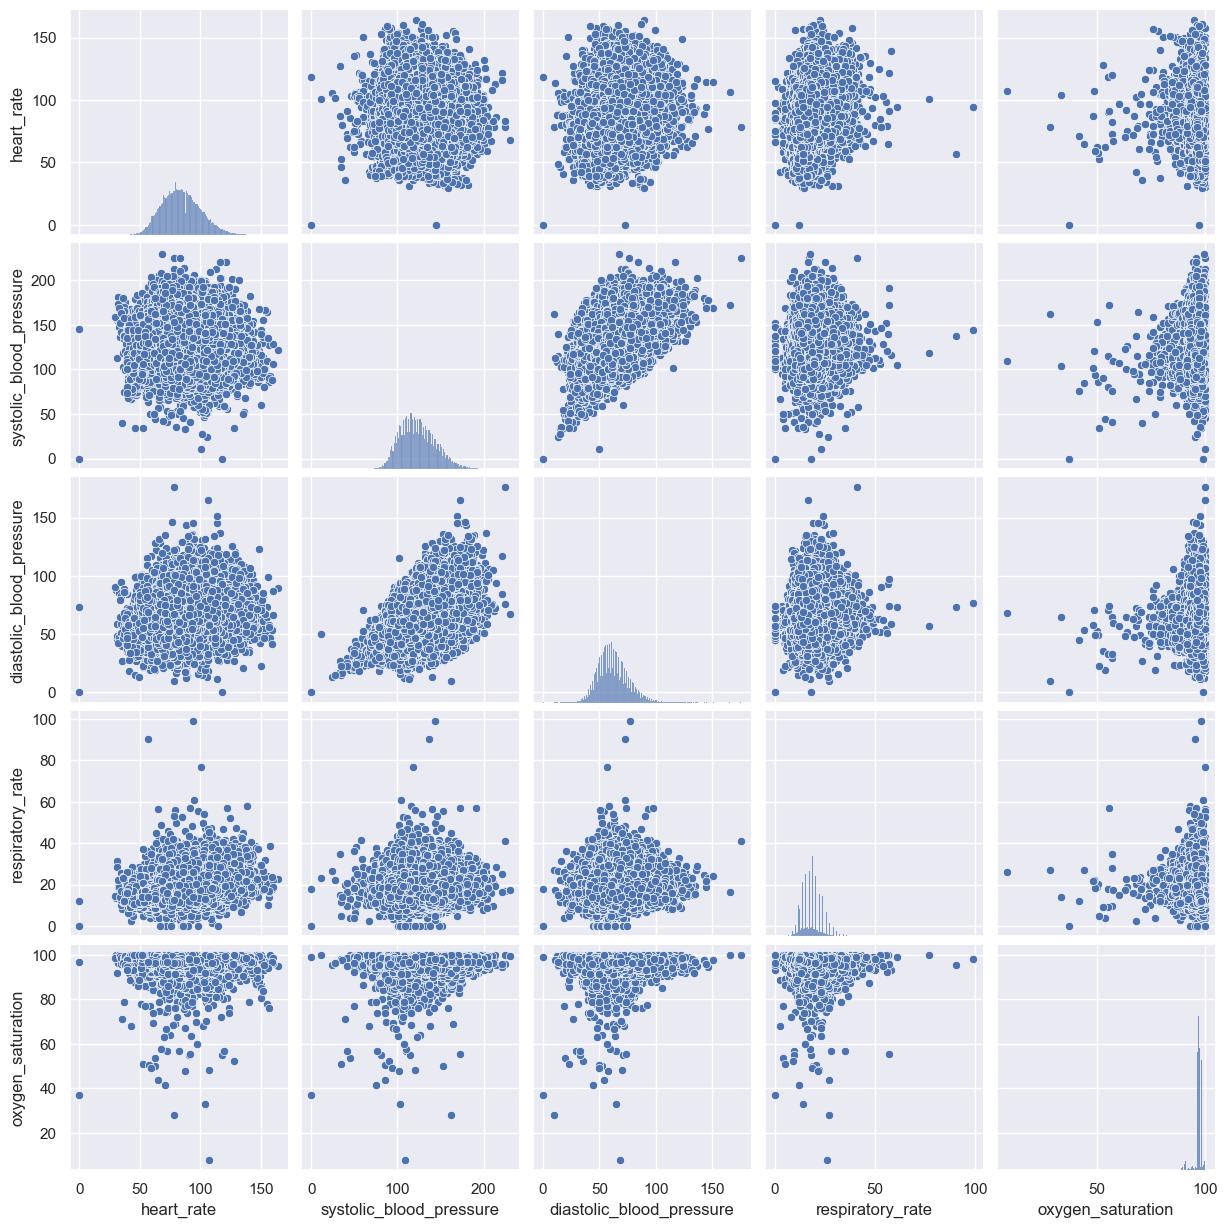

In [3]:
sns.pairplot(df2h.drop(no_miss_cols, axis=1))

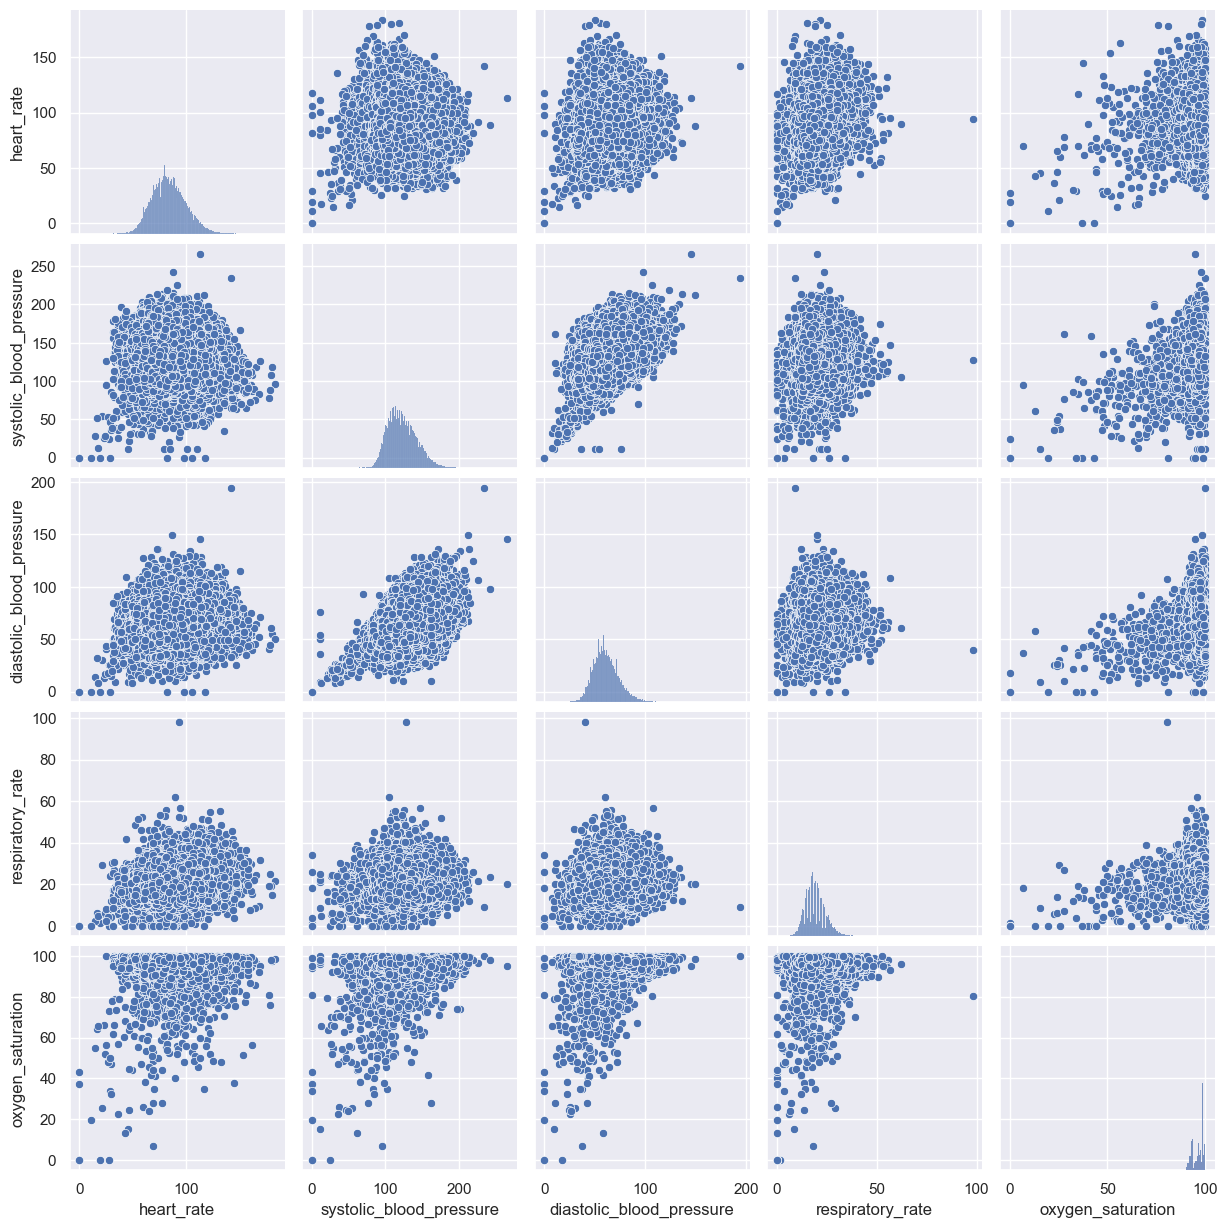

In [4]:
sns.pairplot(df4h.drop(no_miss_cols, axis=1))

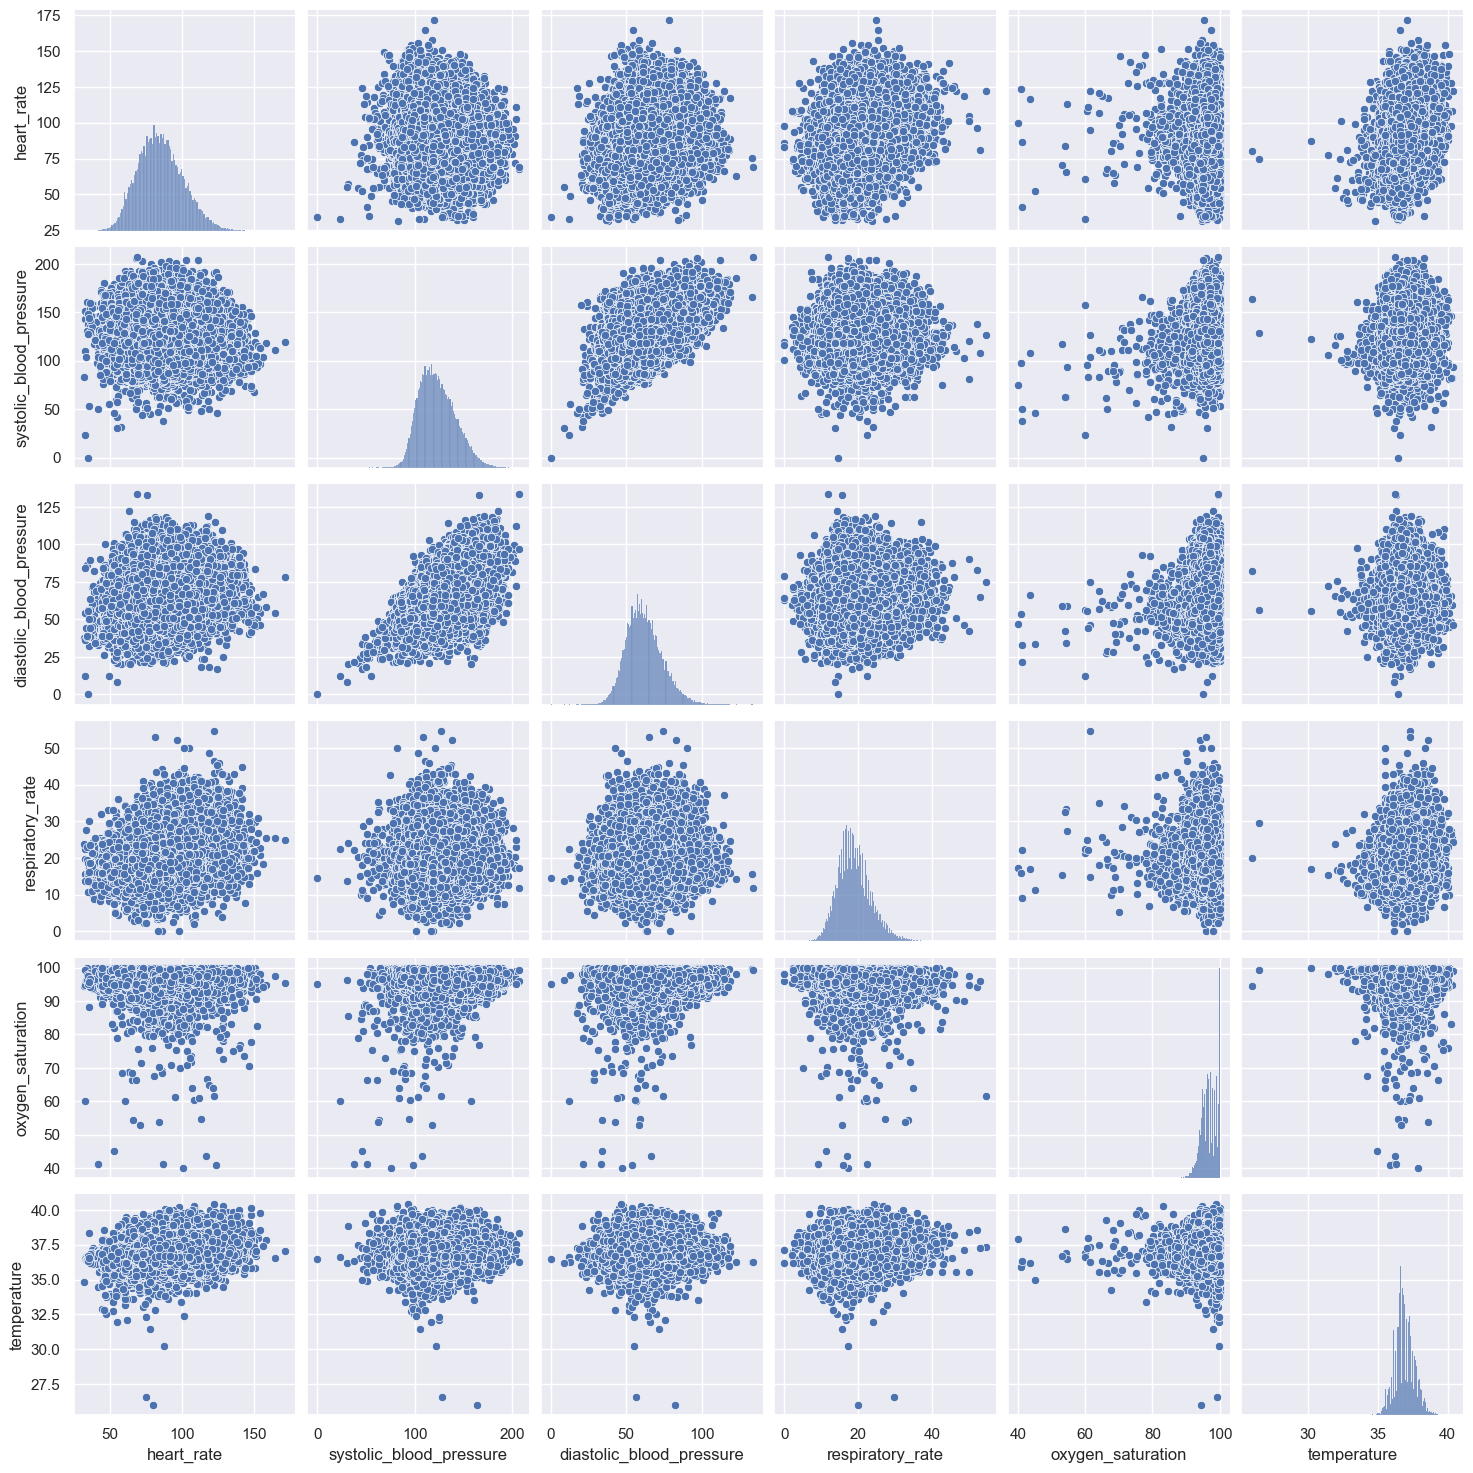

In [5]:
sns.pairplot(df6h.drop(no_miss_cols, axis=1))

In [11]:
df6h.corr(numeric_only=True)

,heart_rate,systolic_blood_pressure,diastolic_blood_pressure,respiratory_rate,oxygen_saturation,temperature,age,hospital_expire_flag
heart_rate,1.000000,-0.035966,0.222677,0.265417,-0.078373,0.271670,-0.192008,0.084970
systolic_blood_pressure,-0.035966,1.000000,0.511631,0.059214,0.050186,0.053874,0.039314,-0.024009
diastolic_blood_pressure,0.222677,0.511631,1.000000,0.052190,0.009156,0.018915,-0.307195,-0.035962
respiratory_rate,0.265417,0.059214,0.052190,1.000000,-0.189817,0.144760,0.072004,0.072801
oxygen_saturation,-0.078373,0.050186,0.009156,-0.189817,1.000000,0.010932,-0.072057,-0.067021
temperature,0.271670,0.053874,0.018915,0.144760,0.010932,1.000000,-0.195922,-0.007609
age,-0.192008,0.039314,-0.307195,0.072004,-0.072057,-0.195922,1.000000,0.092138
hospital_expire_flag,0.084970,-0.024009,-0.035962,0.072801,-0.067021,-0.007609,0.092138,1.000000
